## Iris Flower Classification

#### Library imports
- Using pandas and NumPy for data processing
- Using Matplotlib and seaborn for data visualization
- Using Sklearn to evaluate the build model using Logistic Regression and Random Forest Classifier

In [1]:
import pandas
import numpy
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

Loading the Iris dataset into pandas dataframe

Attribute Information:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica

In [2]:
data = pandas.read_csv("/home/khyathi/Desktop/ML@Kaggle/Jupyter/Iris Flower Classification/iris_dataset.csv", header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Lets plot the dataset

In [3]:
dataset = load_iris()
X = dataset.data
y = dataset.target
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Classifying the fowers by sepal width vs sepal length

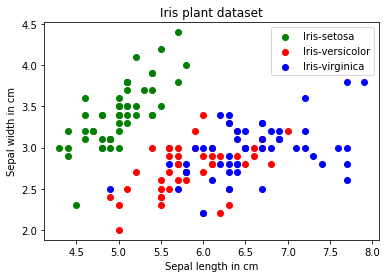

In [4]:
plt.scatter(data.iloc[:,0:1][data[4]=='Iris-setosa'], data.iloc[:,1:2][data[4]=='Iris-setosa'], color ='green' , label='Iris-setosa')
plt.scatter(data.iloc[:,0:1][data[4]=='Iris-versicolor'], data.iloc[:,1:2][data[4]=='Iris-versicolor'], color ='red' , label='Iris-versicolor')
plt.scatter(data.iloc[:,0:1][data[4]=='Iris-virginica'], data.iloc[:,1:2][data[4]=='Iris-virginica'], color ='blue' , label='Iris-virginica')
plt.title("Iris plant dataset")
plt.xlabel("Sepal length in cm")
plt.ylabel("Sepal width in cm")
plt.legend()
plt.show()

Classifying the fowers by petal width vs petal length

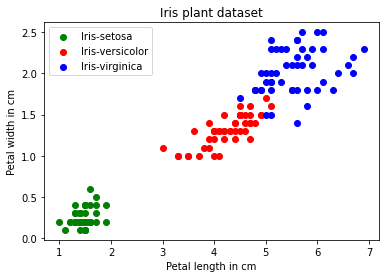

In [5]:
plt.scatter(data.iloc[:, 2:3][data[4]=='Iris-setosa'], data.iloc[:, 3:4][data[4]=='Iris-setosa'], color ='green' , label='Iris-setosa')
plt.scatter(data.iloc[:, 2:3][data[4]=='Iris-versicolor'], data.iloc[:, 3:4][data[4]=='Iris-versicolor'], color ='red' , label='Iris-versicolor')
plt.scatter(data.iloc[:, 2:3][data[4]=='Iris-virginica'], data.iloc[:, 3:4][data[4]=='Iris-virginica'], color ='blue' , label='Iris-virginica')
plt.title("Iris plant dataset")
plt.xlabel("Petal length in cm")
plt.ylabel("Petal width in cm")
plt.legend()
plt.show()

Classifying the flowers using the iris sklearn dataset by petal vs sepal size (Area)

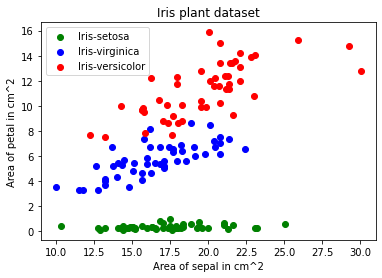

In [6]:
plt.scatter(X[:, 0][y == 0] * X[:, 1][y == 0], X[:, 2][y == 0] * X[:, 3][y == 0], color ='green', label='Iris-setosa')
plt.scatter(X[:, 0][y == 1] * X[:, 1][y == 1], X[:, 2][y == 1] * X[:, 3][y == 1], color ='blue', label='Iris-virginica')
plt.scatter(X[:, 0][y == 2] * X[:, 1][y == 2], X[:, 2][y == 2] * X[:, 3][y == 2], color ='red', label='Iris-versicolor')
plt.title("Iris plant dataset")
plt.xlabel("Area of sepal in cm^2")
plt.ylabel("Area of petal in cm^2")
plt.legend()
plt.show()

Dividing the dataset into training and testing sets

In [7]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Logistic regression model

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.score(X, y)

0.9666666666666667

In [10]:
log_reg.score(X_train, y_train)

0.9642857142857143

In [11]:
log_reg.score(X_test, y_test)

0.9736842105263158

### Random Forest Classifier

In [12]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
rand_for.score(X_test,y_test)

0.8947368421052632

In [14]:
y_predicted=rand_for.predict(X_test)

### Confusion Matrix

In [15]:
cm=confusion_matrix(y_test,y_predicted)

Text(69.0, 0.5, 'Truth')

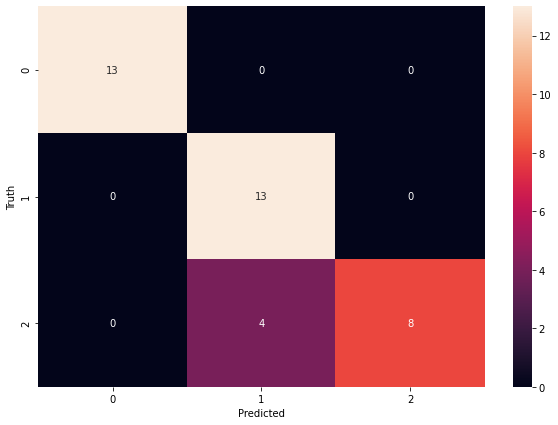

In [16]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')